# Basic Setup and Data Loading

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [31]:
supplemental = pd.read_csv("../Data/supplemental_clinical_data.csv")
supplemental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [32]:
supplemental.shape

(2223, 8)

In [33]:
supplemental.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [34]:
supplemental.describe

<bound method NDFrame.describe of       visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         35_0          35            0      5.0      3.0     16.0      0.0   
1        35_36          35           36      6.0      4.0     20.0      0.0   
2         75_0          75            0      4.0      6.0     26.0      0.0   
3        75_36          75           36      1.0      8.0     38.0      0.0   
4        155_0         155            0      NaN      NaN      0.0      NaN   
...        ...         ...          ...      ...      ...      ...      ...   
2218   65382_0       65382            0      NaN      NaN      0.0      NaN   
2219   65405_0       65405            0      5.0     16.0     31.0      0.0   
2220   65405_5       65405            5      NaN      NaN     57.0      NaN   
2221   65530_0       65530            0     10.0      6.0     24.0      0.0   
2222  65530_36       65530           36      8.0      4.0     15.0      4.0   

     upd23b_clini

In [35]:
supplemental.dtypes

visit_id                                object
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [36]:
supplemental.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [37]:
supplemental.drop(columns = ['upd23b_clinical_state_on_medication'], inplace = True)

In [38]:
supplemental.duplicated().sum()

np.int64(0)

In [39]:
supplemental.duplicated(subset = ['visit_id']).sum()

np.int64(0)

In [40]:
supplemental.isna().sum()

visit_id         0
patient_id       0
visit_month      0
updrs_1        213
updrs_2        214
updrs_3          5
updrs_4        928
dtype: int64

In [41]:
supplemental.shape

(2223, 7)

In [42]:
supplemental['visit_month'].value_counts()

visit_month
0     771
36    258
6     248
12    235
30    223
24    194
18    176
5     118
Name: count, dtype: int64

In [43]:
supplemental.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4'],
      dtype='object')

In [44]:
supplemental_updrs1_prelim = supplemental[[ 'patient_id', 'visit_month', 'updrs_1' ]].copy()

In [45]:
supplemental_updrs1 = supplemental_updrs1_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_1' )

In [46]:
supplemental_updrs1.columns = [ f'updr_1_month_{col}' for col in supplemental_updrs1.columns ]                                                       

In [47]:
supplemental_updrs1 = supplemental_updrs1.reset_index()  


In [48]:
supplemental_updrs1.head()

,patient_id,updr_1_month_0,updr_1_month_5,updr_1_month_6,updr_1_month_12,updr_1_month_18,updr_1_month_24,updr_1_month_30,updr_1_month_36
0,35,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,75,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,5.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,527,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [49]:
supplemental_updrs1.shape

(771, 9)

In [50]:
supplemental_updrs1.isna().sum()

patient_id           0
updr_1_month_0      95
updr_1_month_5     771
updr_1_month_6     523
updr_1_month_12    536
updr_1_month_18    595
updr_1_month_24    577
updr_1_month_30    548
updr_1_month_36    513
dtype: int64

In [51]:
supplemental_updrs1.drop(columns = [ 'updr_1_month_5'], inplace = True)

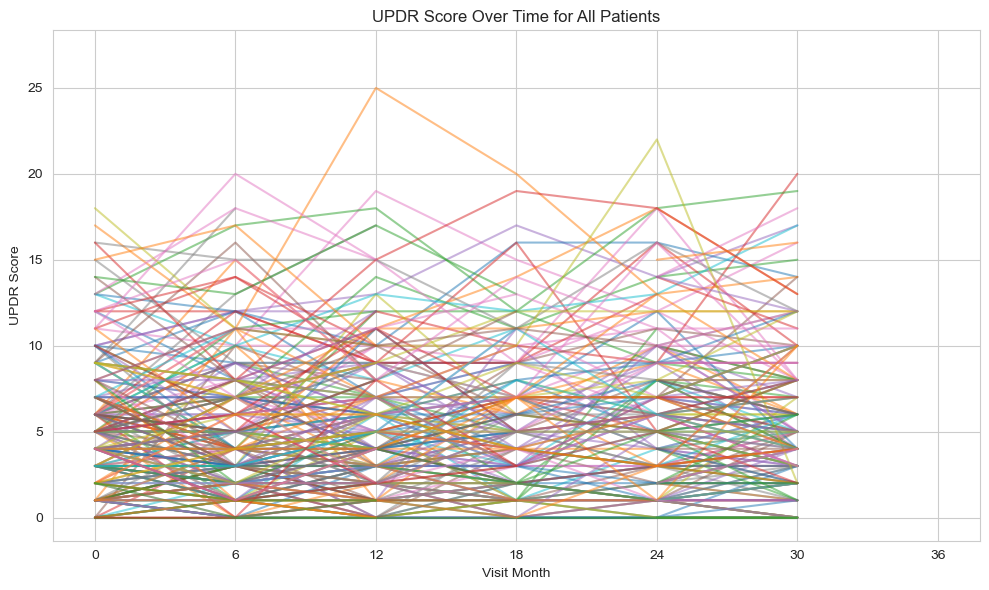

In [ ]:

supplemental_updrs1 = supplemental_updrs1.set_index('patient_id')

# Replace the default month indices (0 to 6) with actual months
visit_months = [0, 6, 12, 18, 24, 30, 36]

plt.figure(figsize=(10, 6))

for patient_id, row in supplemental_updrs1.iterrows():
    plt.plot(visit_months, row.values, label=f'Patient {patient_id}', alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(visit_months)  # Set x-axis ticks to actual visit months
plt.grid(True)

plt.tight_layout()
plt.show()


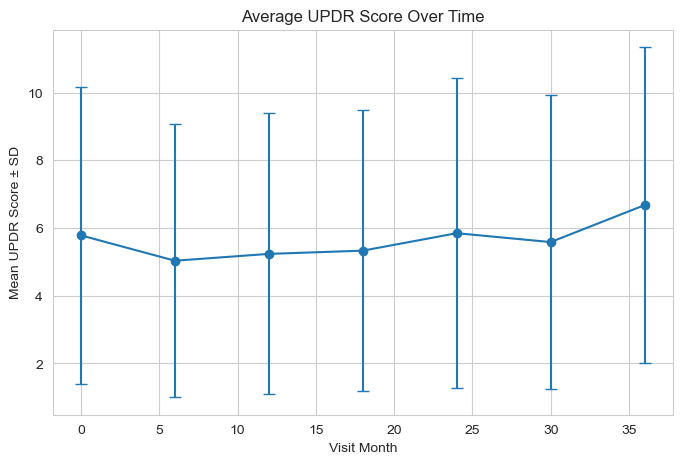

In [53]:
mean_updr_1_score = supplemental_updrs1.mean()
std_updr_1_score = supplemental_updrs1.std()
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_1_score, yerr=std_updr_1_score, fmt='-o', capsize=4)
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.grid(True)
plt.show()

In [54]:
summary_stats = supplemental_updrs1.describe().T
print(summary_stats)

                 count      mean       std  min  25%  50%  75%   max
updr_1_month_0   676.0  5.781065  4.391507  0.0  3.0  5.0  8.0  27.0
updr_1_month_6   248.0  5.032258  4.031125  0.0  2.0  4.0  7.0  20.0
updr_1_month_12  235.0  5.234043  4.147972  0.0  2.0  4.0  7.0  25.0
updr_1_month_18  176.0  5.329545  4.157531  0.0  2.0  5.0  7.0  20.0
updr_1_month_24  194.0  5.845361  4.574859  0.0  2.0  5.0  8.0  22.0
updr_1_month_30  223.0  5.582960  4.328938  0.0  2.0  5.0  8.0  20.0
updr_1_month_36  258.0  6.674419  4.663231  0.0  3.0  6.0  9.0  26.0


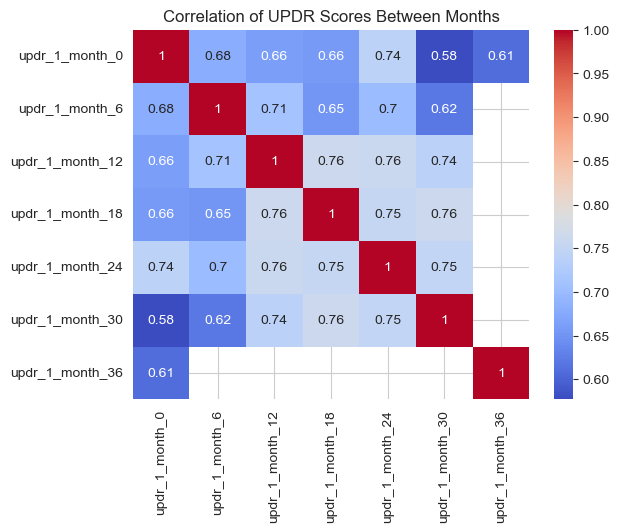

In [60]:
sns.heatmap(supplemental_updrs1[supplemental_updrs1.columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of UPDR Scores Between Months")
plt.show()

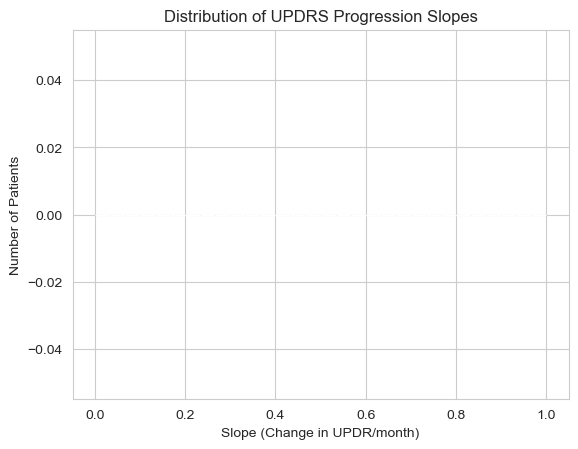